# 5.3.1 Feature Engineering

In [1]:
# cleaning csv file

In [2]:
# Import all needed lbraries
import pandas as pd
import seaborn as sns

In [3]:
# Read csv file
df = pd.read_csv('crime.csv')
df.head(3)

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/2006 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/2006 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/2006 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101


In [4]:
# Check general info of the dataframe and see if there are NaN/Null values
df.info()
print('')
print('Count of NA:')
print(df.isna().sum())
print('')
print('No. of duplicates:',df.duplicated(keep = 'first').sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cdatetime      7584 non-null   object 
 1   address        7584 non-null   object 
 2   district       7584 non-null   int64  
 3   beat           7584 non-null   object 
 4   grid           7584 non-null   int64  
 5   crimedescr     7584 non-null   object 
 6   ucr_ncic_code  7584 non-null   int64  
 7   latitude       7584 non-null   float64
 8   longitude      7584 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 533.4+ KB

Count of NA:
cdatetime        0
address          0
district         0
beat             0
grid             0
crimedescr       0
ucr_ncic_code    0
latitude         0
longitude        0
dtype: int64

No. of duplicates: 38


In [5]:
# Remove duplicates and check
df = df.drop_duplicates()
df.duplicated(keep = 'first').sum()

0

In [6]:
# Check and count what months and years are in the dataframe
month_check = pd.to_datetime(df['cdatetime']).dt.month_name()
year_check = pd.to_datetime(df['cdatetime']).dt.year

print('Month/s:', month_check.value_counts())
print('Year/s:', year_check.value_counts())

Month/s: January    7546
Name: cdatetime, dtype: int64
Year/s: 2006    7546
Name: cdatetime, dtype: int64


In [7]:
# Convert cdatetime column values to day 
df['cdatetime'] = pd.to_datetime(df['cdatetime']).dt.day
df.head(2)

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186


In [8]:
# Filter January 11 to 20 data, and count number of rows left
df1 = df.loc[(df['cdatetime'] >= 11) & (df['cdatetime'] <= 20 )]

print('Row Count :', len(df1))
df1.head(3)

Row Count : 2574


,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
2338,11,8034 POCKET RD,4,4C,1295,459 PC BURGLARY VEHICLE,2299,38.475045,-121.531410
2339,11,2800 L ST,3,3B,748,TELEPEST -I RPT,7000,38.571156,-121.469631
2340,11,2267 KNIGHT WAY,4,4B,976,594(B)(2)(A) VANDALISM/ -$400,2999,38.526041,-121.486374


In [9]:
# Frequency of districts
df1.district.value_counts()

3    571
2    468
6    443
4    439
5    368
1    285
Name: district, dtype: int64

In [10]:
# Group and aggregate the number of Crimes per Day per district to new column 'district_count'
data = df1.groupby(['district', 'cdatetime'], as_index = False).agg(
    district_count = pd.NamedAgg(column = 'district', aggfunc = 'count')
)
data.head()

,district,cdatetime,district_count
0,1,11,25
1,1,12,35
2,1,13,34
3,1,14,27
4,1,15,24


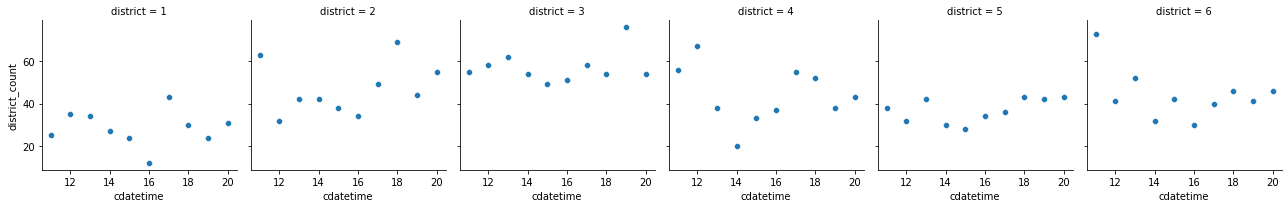

In [11]:
# Scatter Plot of all Districts showing x-axis: the dates (Jan 11-20) and y-axis: the number of crimes

g = sns.FacetGrid(data, col = 'district', margin_titles = True)
g.map_dataframe(sns.scatterplot, 'cdatetime', 'district_count')

# In case we want to see per District

[Text(0.5, 1.0, 'District 1: Number of Crimes per Day (Jan 11-20)')]

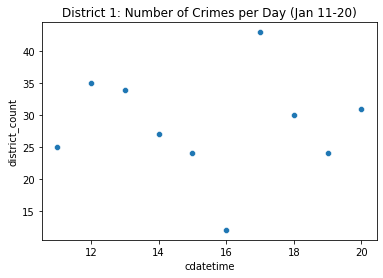

In [12]:
# District 1 Scatter Plot
dist1 = data.loc[data['district'] == 1]
sns.scatterplot(data = dist1, x = 'cdatetime', y ='district_count').set(
    title = 'District 1: Number of Crimes per Day (Jan 11-20)'
)

[Text(0.5, 1.0, 'District 2: Number of Crimes per Day (Jan 11-20)')]

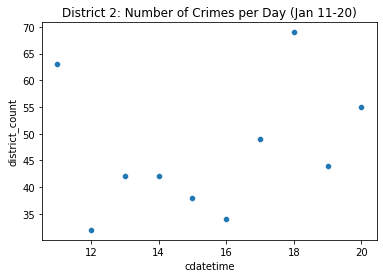

In [13]:
# District 2 Scatter Plot
dist2 = data.loc[data['district'] == 2]
sns.scatterplot(data = dist2, x = 'cdatetime', y ='district_count').set(
    title = 'District 2: Number of Crimes per Day (Jan 11-20)'
)

[Text(0.5, 1.0, 'District 3: Number of Crimes per Day (Jan 11-20)')]

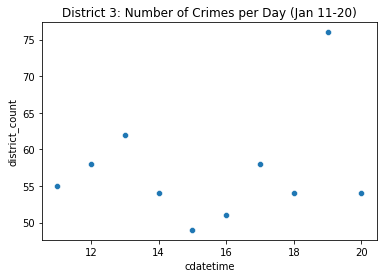

In [14]:
# District 3 Scatter Plot
dist3 = data.loc[data['district'] == 3]
sns.scatterplot(data = dist3, x = 'cdatetime', y ='district_count').set(
    title = 'District 3: Number of Crimes per Day (Jan 11-20)'
)

[Text(0.5, 1.0, 'District 4: Number of Crimes per Day (Jan 11-20)')]

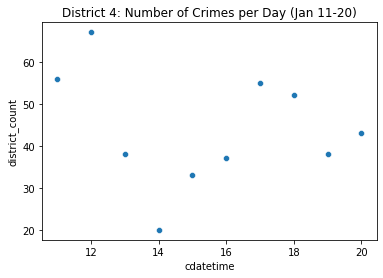

In [15]:
# District 4 Scatter Plot
dist4 = data.loc[data['district'] == 4]
sns.scatterplot(data = dist4, x = 'cdatetime', y ='district_count').set(
    title = 'District 4: Number of Crimes per Day (Jan 11-20)'
)

[Text(0.5, 1.0, 'District 5: Number of Crimes per Day (Jan 11-20)')]

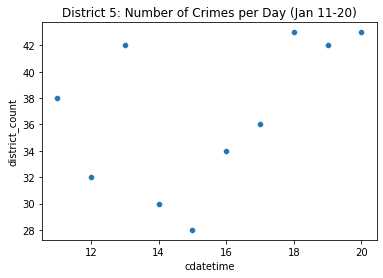

In [16]:
# District 5 Scatter Plot
dist5 = data.loc[data['district'] == 5]
sns.scatterplot(data = dist5, x = 'cdatetime', y ='district_count').set(
    title = 'District 5: Number of Crimes per Day (Jan 11-20)'
)

[Text(0.5, 1.0, 'District 6: Number of Crimes per Day (Jan 11-20)')]

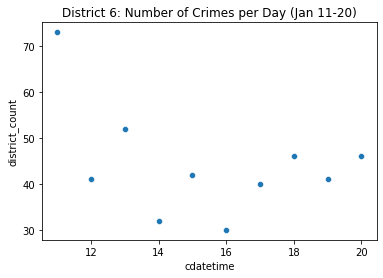

In [17]:
# District 6 Scatter Plot
dist6 = data.loc[data['district'] == 6]
sns.scatterplot(data = dist6, x = 'cdatetime', y ='district_count').set(
    title = 'District 6: Number of Crimes per Day (Jan 11-20)'
)